## PROJECT: Wrangle and Analyse Data from Twitter WeRateDogs®


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gathering)
- [Part II - Assessing Data](#assessing)
- [Description of Columns](#data_in_columns)
- [SUMMARY of the Quality and Tidyness problems](#problems)
- [Part III - Cleaning Data](#cleaning)
- [Part IV - Storing Data](#storing)
- [Part V - Analyzing and Visualizing Data](#analysing)
- [Part VI - Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

We will be wrangling (and analysing and visualizing) the popular tweet archive of Twitter WeRateDogs® (@dog_rates) https://twitter.com/dog_rates. The WeRateDogs® Twitter account rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson and has received international media attention both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter for breaking these laws. Twitter WeRateDogs® has a unique rating scale where most ratings have a denominator of 10 and a numerator greater than 10 (e.g. 11/10, 12/10, 13/10). Apparently, this rating scale with numerators exceeding denominators was not originally intended and its validity was questioned by the early user Brent. However, he received the answer "they're good dogs Brent." 

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

Our goal: wrangle WeRateDogs® Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive contains basic tweet information but additional gathering, then assessing and cleaning is required for meaningful analyses and visualizations.

Key Points:

- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings, and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators do not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- We do not need to gather the tweets beyond August 1st, 2017. We can, but we won't be able to gather the image predictions for these tweets since we don't have access to the ML algorithm used.

Data Sources:
- WeRateDogs® Twitter archive sent to Udacity via email in a CSV flat file structure (Comma-separated values)
- Additional data via the Twitter API (Application Programming Interfaces)
- Additional data via Download from Internet of a file in the flat file structure TSV (Tab-separated values)


<a id='gathering'></a>
## Gathering Data 

Tasks:

➔ Gather data from multiple sources, including gathering files,
programmatically downloading files, and accessing data from APIs

➔ Import data of various file formats into pandas, including flat files (e.g. TSV) and JSON files


To get started, let's import our libraries.

In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

### Enhanced Twitter Archive

The WeRateDogs® Twitter archive. We download this file manually from the Udacity website: *`twitter_archive_enhanced.csv`*

The WeRateDogs® Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, Udacity has filtered for tweets with ratings only (there are 2356).


In [2]:
# Of the 5000+ tweets, Enhanced Twitter Archive has filtered for tweets with ratings only (there are 2356).
df1 = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [3]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Description of the data in the columns:

**`df1`** columns:
- **tweet_id**: Unique Identifier of a Tweet (18-digit numerical)<font color='blue' > (see below). </font><font color='black'>[Numerical]</font> 
- **reply_to_status_id**: In the context of someone else’s tweet [Numerical]
- **in_reply_to_user_id**: Reply to a specific user  	[Numerical]
- **timestamp**: Date/Time of the tweet <font color='black'>[Date]</font> 
- **source**: Origin of the tweet (e.g. web, mobile device) <font color='black'>[Unicode]</font> 
- **text**: Text of the tweet [Unicode String]
- **retweeted_status_id**: Original tweet (if re-tweeted) [Numerical]. <font color='black'>Retweets can be distinguished from typical Tweets by the existence of a retweeted_status!</font>
 
- **retweeted_status_user_id**: User of the original tweet. [Numerical]
- **retweeted_status_timestamp**: Original date.time of the re-tweeted tweet. <font color='black'>[Date]</font> 
- **expanded_urls**: Original URI (before URL minification) [Unicode String]
- **rating_numerator**: Rating numerator extracted from text. Should be on a scale from 0-10, but oftentimes is higher. <font color='black'>[Float]</font>
- **rating_denominator**: Rating denominator extracted from text. Should be 10, but is sometimes different.   <font color='black'>[Numeric!=0]</font> 
- **name**: Dog's name extracted from text. <font color='black'>[Unicode String]  proper noun</font> 
- **doggo**: Doggo stage extracted from text. [Boolean] 
- **floofer**: Floofer stage extracted from text. [Boolean]
- **pupper**: Pupper stage extracted from text. [Boolean]
- **puppo**: Puppo stage extracted from text. [Boolean]

<font color='blue'>**(tweet_id)** The last part of the tweet URL after "status/"   Example: → https://twitter.com/dog_rates/status/889531135344209921 

( Source: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object )


( Source: https://sanderstechnology.net/2013/importing-a-twitter-archive-into-sql-server-2014/12246/ )

### Additional Data via the Twitter API (Application Programming Interfaces)

We query Twitter API for each tweet in the Twitter archive *`twitter_archive_enhanced.csv`* and save JSON in a text file *`tweet_json.txt`*. These are hidden to comply with Twitter's API terms and conditions.

We extract each tweet's **retweet count** and **favorite ("like") count** at minimum, and any additional data we find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in the file *`tweet_json.txt`* file. Each tweet's JSON data is written to its own line. Then we read this .txt file line by line into a pandas dataframe with (at minimum) tweet ID, retweet count, and favorite count. 

Note: We do not include our Twitter API keys, secrets, and tokens in this project submission.


In [4]:

consumer_key =     'xxxxxx'
consumer_secret =  'xxxxxx'
access_token =     'xxxxxx'
access_secret =    'xxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)


In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

There are 24 tweets that failed to download. The error messages 'No status found with that ID.' or 'Sorry, you are not authorized to see this status.' are provided. 

In Python 3, there is one text type: str, which holds Unicode data. 


In [5]:
# List of dictionaries to build file by file and later convert to a DataFrame
data    = []
df_list = []

with open('tweet_json.txt',encoding='utf-8') as f:  # UTF-8 is only one of the many ways that you can encode a files 
    for line in f:                                  # However, we know UTF-8 was used to store the data 
        data.append(json.loads(line))

for n in range(len(data)):
    id_str                = data[n]['id_str']
    favorite_count     = data[n]['favorite_count'] # and favorite ("like") count
    retweet_count      = data[n]['retweet_count']  # Each tweet's retweet count
    text_range         = data[n]['display_text_range']
    # Append to list of dictionaries
    df_list.append({'tweet_id': id_str,
                    'favorite_count': favorite_count,
                    'retweet_count': retweet_count,
                    'display_text_range': text_range, 
                   })
    
df2 = pd.DataFrame(df_list, columns = ['tweet_id', 
                                      'favorite_count', 
                                      'retweet_count', 
                                      'display_text_range',
                                     ])
df2.shape

(2331, 4)

In [6]:
df2.head()


,tweet_id,favorite_count,retweet_count,display_text_range
0,892420643555336193,36633,7803,"[0, 85]"
1,892177421306343426,31562,5780,"[0, 138]"
2,891815181378084864,23774,3825,"[0, 121]"
3,891689557279858688,39950,7970,"[0, 79]"
4,891327558926688256,38152,8604,"[0, 138]"


Description of the variables in the columns:

**`df2`** columns:
- **tweet_id**: Unique Identifier of a Tweet <font color='black'>[Unicode]</font>
- **favorite_count**: Nullable. Indicates approximately how many times this Tweet has been liked by Twitter users. [Integer]
- **retweet_count**: Number of times this Tweet has been retweeted  	[Integer]
- **display_text_range**:  identifies the start and end of the displayable content of the tweet [Unicode]

( Source: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object )

### Additional Data via Download from Internet of the Flat File Structure TSV (Tab-separated values)

The *`image-predictions.tsv`* file contains tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Flat files contain tabular data in plain text format with one data record per line and each record or line having one or more fields. These fields are separated by delimiters, like commas, tabs, or colons.


In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [8]:
r # Verify successful response (i.e. Response = 200)

<Response [200]>

Pandas has one main function for parsing flat files and it is **read_csv**. 

In [9]:
# Import the image-predictions TSV file into a Dataframe
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
image_df.shape

(2075, 12)

In [11]:
# Check to see if the file was imported correctly
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Description of the variables in the columns:

**`image_df`** columns:
- **tweet_id**: Unique Identifier of a Tweet <font color='black'>[Numerical]</font> 
- **jpg_url**: Image URL  [Unicode]
- **img_num**: image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) [Integer]
- **p1**: the algorithm's #1 prediction for the image in the tweet  	[Unicode]
- **p1_conf**: how confident the algorithm is in its #1 prediction [Float]
- **p1_dog**: whether or not the #1 prediction is a breed of dog  [Boolean]
- **p2**: the algorithm's #2 prediction for the image in the tweet  	[Unicode]
- **p2_conf**: how confident the algorithm is in its #2 prediction [Float]
- **p2_dog**:  whether or not the #2 prediction is a breed of dog [Boolean]
- **p3**: the algorithm's #3 prediction for the image in the tweet  	[Unicode]
- **p3_conf**: how confident the algorithm is in its #3 prediction [Float]
- **p3_dog**:  whether or not the #3 prediction is a breed of dog [Boolean]

We have successfully gathered all the data. Next, we will be analysing the three tables.

<a id='assessing'></a>
## Assessing Data##

➔ Assess data visually and programmatically using pandas

➔ Distinguish between dirty data (content or “quality” issues) and
messy data (structural or “tidiness” issues)

➔ Identify data quality issues and categorize them using metrics:
validity, accuracy, completeness, and consistency



You can assess data for:
- ***QUALITY:*** issues with content. Low quality data is also known as dirty data.
  (e.g. inaccurate data, corrupted data, duplicate data)
- ***TIDINESS:*** issues with structure that prevent easy analysis. Untidy data is also known as messy data. 

***QUALITY dimensions: (the four main)***

- ***Completeness:*** do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- ***Validity:*** we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- ***Accuracy:*** inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- ***Consistency:*** inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


***TIDINESS requires:***

* Each variable forms a column.
* Each observation forms a row.
* Each type of observational unit forms a table.

The requirements of this project are to assess and clean at least ***8 quality issues*** and at least ***2 tidiness issues*** in this dataset.


We try `.head` , `.tail` and `.sample`on the **`df1`** table to visually assess the dataframe.

In [12]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1753,678800283649069056,NaN,NaN,2015-12-21 04:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with some mean tan lines. Snaz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678800283...,12,10,None,None,None,pupper,None
1948,673697980713705472,NaN,NaN,2015-12-07 02:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,None,None,pupper,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
693,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None


> ***QUALITY (Validity):*** issues revealed by visual assessment
>- (Q1) **`df1`** `source` contains the series of characters ***'<a href='*** before useful HTTP address
>- (Q2) **`df1`** `name` Some dog names are not proper nouns but adjectives like 'this' (row # 1120) `tweet_id` = (*731156023742988288*) or 'incredibly' (row # 542) in `tweet_id` = (*806219024703037440*)


> ***QUALITY (Consistency):*** issues revealed by visual assessment
- (Q3) **`df1`** `retweeted_status_id` is in a ***float*** format rather than an ***integer*** format 
- (Q4) **`df1`** `retweeted_status_user_id` is in a ***float*** format rather than an ***integer*** format 
- (Q5) **`df1`** `in_reply_to_status_id` is in a ***float*** format rather than an ***integer*** format 
- (Q6) **`df1`** `in_reply_to_user_id` is in a ***float*** format rather than an ***integer*** format 

>***Tidiness (rule: each variable forms a column)*** issues revealed by visual assessment
>- (T1) **`df1`** `rating_numerator` and `rating_denominator` combined contain ***one variable*** `rating` in ***two columns***. All ratings should be expressed on a scale of [0 to 10] (like 0 to 100%) but can get higher to reflect the unique WeRateDogs® rating.

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 2356 entries in `tweet_id` , `rating_numerator` and `rating_denominator`. Of the 5000+ tweets, **`df1`** was filtered for tweets with ratings only.

How many of the **`df1`** `tweet_id` are unique (i.e. are there any duplicates)?

In [14]:
df1.nunique() #  show no. of unique entries in each column 

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

All of the observations (i.e. rows) in columns **`df1`** `tweed_id`, `timestamps` and `text` are unique and contain no duplicates.


Do any of **`df1`** rows have missing values?

There are **2356** unique **`df1`** `tweed_id`, `timestamps` and `text` entries. 
 

There are only **77** rows with unique **`df1`** `in_reply_to_` entries.

there are only **31** rows with unique **`df1`** `in_reply_to_user_id` entries.

there are only **181** rows with unique **`df1`** `retweeted_status_` and `retweeted_status_timestamp` entries. 

there are only **25** rows with unique **`df1`** `retweeted_status_user_id` entries.

However, we do not expect to have entries in columns `in_reply_to_`,  `in_reply_to_user_id`,  `retweeted_status_`,  `retweeted_status_timestamp` and  `retweeted_status_user_id` for every observation (i.e. in every row). Therefore, NANs in those five columns do not constitute a data quality issue.

Do any of the entries in **`df1`** `name' show no name?

In [15]:
df1[df1['name']=='None'].shape[0] # No of dogs with name 'None'

745

However, some of those 745 tweets whithout a **`df1`** `name` entry do display a proper dog's name in the **`df1`** `text` entry. 

In [16]:
print('name:', df1['name'][35])
print('text:', df1['text'][35])

name: None
text: I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk


In [17]:
df1.loc[35]

tweet_id                                                     885518971528720385
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-13 15:19:09 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          I have a new hero and his name is Howard. 14/1...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/4bonds2carbon/status/88551...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

> ***QUALITY (Completeness):*** issue revealed programmatically using pandas:
>- (Q7) Empty **`df1`** `name` in (row # 35) ( `tweet_id` = *885518971528720385* ) despite mentioning of proper dog name 'Howard' in `text`. 

Do any of the **`df1`** `rating_denominator` entries 
have an invalid value of zero?

In [18]:
df1[df1['rating_denominator']==0] # Rating denominator is zero for tweet_id 835246439529840640 (row 313) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [19]:
df1['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

> ***QUALITY (Validity):*** issue revealed programmatically using pandas:
>- (Q8) Invalid zero measurement of **`df1`** `rating_denominator` in (row # 313) ( `tweet_id` = *835246439529840640* ). The valid rating mentioned in the text is 13/10. 
- (Q9) Incorrect value of '960' in **`df1`** `rating_numerator` (row # 313) ( `tweet_id` = *835246439529840640* ). The valid rating mentioned in the text is 13/10. 

Let us look at the distribution of the values in **`df1`** `rating_denominator`. 

In [20]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The vast majority of the 2356 entries in **`df1`** `rating_denominator` contain the integer value 10 (2333 observations) and 13 contain multiples of 10, presumably for images showing more than one dog. The remaining 10 observations consists of 9 positive values other than 10 or multiples of thereof and 1 observation in the invalid 0 (see above). Therefore, all but the 0 value for `rating_denominator` are positive and valid (i.e. we can use those values as denominators in a math fraction to calculate a rating. 

Let us now look at the distribution of values in **`df1`** `rating_numerator`.  

In [21]:
df1['rating_numerator'].value_counts().head(10)

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

Most values to **`df1`** `rating_numerator` are between 6 and 14 (2272 observations).


Do any of the **`df1`** `rating_numerator` entries show false values not in line with the text of the tweet? 

Let us look at unusually low **`df1`** `rating_numerator` entries below 9 given **WeRateDogs** web side's unique rating scale (i.e. most dogs get ratings above 10).

In [22]:
low_rating = df1[df1['rating_numerator']<9]['text'].keys()
for n in low_rating:
    print(n,df1['text'][n])
    print('rating_numerator', df1['rating_numerator'][n])
    print()

45 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
rating_numerator 5

229 This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
rating_numerator 6

315 When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
rating_numerator 0

387 I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
rating_numerator 7

462 RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
rating_numerator 7

599 RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
rating_numerator 8

605 RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark

An example is **`df1`** `rating_numerator` (row # 45)  ( tweet_id = 883482846933004288 ) with a rating numerator value clearly not in line with the text. 

In [23]:
print(df1['text'][45]) # 
print('rating_numerator', df1['rating_numerator'][45])
type(df1['rating_numerator'][45])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
rating_numerator 5


numpy.int64

The **`df1`** `rating_numerator` entries are of data type ***integer***, but some of the actual ratings in the tweet texts are of type ***float***. Therefore, the data type needs to be changed to be able to better reflect rating nuances.   

> ***QUALITY (Accuracy):*** issue revealed programmatically using pandas:
>- (Q10) Improper data type **integer** in column **`df1`** `rating_numerator` unable to display rating nuances expressed as **float** in the `text`. Example: Rating of 13.5/10 in (row # 45 )( `tweet_id` = *883482846933004288* )
>
>- Erroneous rating in **`df1`** `rating_numerator` (row # 45 )( `tweet_id` = *883482846933004288* ). Correct rating of 13.5/10 mentioned in the text

In [24]:
print(df1['text'][1068]) 
print()
print('rating_numerator : ', df1['rating_numerator'][1068])
print('tweet_id:        : ', df1['tweet_id'][1068])
type(df1['rating_numerator'][1068])

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

rating_numerator :  9
tweet_id:        :  740373189193256964


numpy.int64

> ***QUALITY (Accuracy):*** issue revealed programmatically using pandas:
- (Q11) Erroneous rating in **`df1`** `rating_numerator` (row # 1068) ( `tweet_id` = *740373189193256964* ) confuses historical date 9/11 (i.e. September 11th, 2001) mentioned in the `text` with the rating, despite mentioning of a proper rating 14/10 in the tweet message.

It is a general observation that several of the low ratings are meant to be funny when read next to the dog's picture.

Now let us look at unusually high ratings above 20. They are totally out of line with the rating spectrum and should be investigated.

In [25]:
low_rating = df1[df1['rating_numerator']>19]['text'].keys()
for n in low_rating:
    print(n,df1['text'][n])
    print('rating_numerator', df1['rating_numerator'][n])
    print('rating_denominator', df1['rating_denominator'][n])
    print()

188 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
rating_numerator 420
rating_denominator 10

189 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
rating_numerator 666
rating_denominator 10

290 @markhoppus 182/10
rating_numerator 182
rating_denominator 10

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator 960
rating_denominator 0

340 RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
rating_numerator 75
rating_denominator 10

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
rating_numerator 84
rating_denominator 70

516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.c

> ***QUALITY (Accuracy):*** issue revealed programmatically using pandas:
>
>(Q12) **`df1`** `rating_numerator` / `rating_denominator` in (row # 340) is 75/10 but `text` states 9.75/10
>
>(Q13) **`df1`** `rating_numerator` / `rating_denominator` in (row # 695) is 75/10 but `text` states 9.75/10
>
>(Q14) **`df1`** `rating_numerator` / `rating_denominator` in (row # 763) is 27/10 but `text` states 11.27/10
>
>(Q15) **`df1`** `rating_numerator` / `rating_denominator` in (row # 1202) is 50/50 but `text` states 11/10
>
>(Q16) **`df1`** `rating_numerator` / `rating_denominator`  in (row # 1712) is 26/10 but `text` states 11.26/10
>
>(Q17) **`df1`** `rating_numerator` / `rating_denominator`  in some rows rate several dogs at once (e.g. 144/120)
>
> ***QUALITY (Completeness):*** issue revealed programmatically using pandas:
>
>(Q18) **`df1`** `rating` in (row # 290) is 182/10 totally out of line with the rating scale (i.e. not valid rating)
>
>(Q19) **`df1`** `rating` in (row # 516) is 24/7 but `text` does not include a rating
>
>(Q20) **`df1`** `rating` in (row # 979) is 1776/10 totally out of line with the rating scale (i.e. not valid rating)
>
>(Q21) **`df1`** `rating` in (row # 2074) is 420/10 totally out of line with the rating scale (i.e. not valid rating)


Let us look at **`df2`**  obtained from Twitter's API. `retweet count` , `favorite count` and `display_text_range` are 3 of the **`df1`** column omissions.

In [26]:
df2.sample(5)

,tweet_id,favorite_count,retweet_count,display_text_range
1499,690607260360429569,294,17,"[0, 21]"
1247,709409458133323776,2639,690,"[0, 79]"
352,828770345708580865,26059,5992,"[0, 137]"
1960,672898206762672129,888,413,"[0, 125]"
2034,671186162933985280,719,204,"[0, 98]"


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id              2331 non-null object
favorite_count        2331 non-null int64
retweet_count         2331 non-null int64
display_text_range    2331 non-null object
dtypes: int64(2), object(2)
memory usage: 72.9+ KB


In [28]:
print(df2.display_text_range[0][0]) # Example of row 0 with a list of two variables in one column
print(df2.display_text_range[0][1])
type(df2.display_text_range[0])

0
85


list

The data in **`df2`** is very dense (i.e. does not contain NANs). The observations in the columns `favorite_count` and `retweet_count` contain integer variables that can be used to calculate the most popular tweet, for example. However, the column `display_text_range` violates a rule of tidy data: 

>***Tidiness (rule: each variable forms a column)***
> - (T2) **`df2`** `display_text_range` contains a list with two variables (**'start_text_range'** and **'end_text_range'**) in one column.
>
> ***QUALITY (Accuracy):*** issue revealed programmatically using pandas:
>***integer*** in **`df1`** and **`image_df`**). 
>- (Q22) **`df2`** data type of `favorite_count` and `retweet_count` does not allow numerical calculations (e.g. additions)



Let us now look at **`image_df`**  obtained via programmatic download from Udacity's webside:

In [29]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

**`image_df`** has 2075 rows, but only 2009 unique entries in `jpg_url` (i.e. unique images). Let us investigate those 66 duplicates.

In [33]:
image_df_duplicate = (image_df.jpg_url[image_df.jpg_url.duplicated()]) 
print(image_df_duplicate.shape[0])

66


Let us visually inspect the **`image_df`**  list of **original and duplicate images**. Show url of original and duplicate image next to each other:

In [34]:
original_duplicate_images = image_df.groupby('jpg_url').filter(lambda g: (g.nunique() > 1).any()) # filter for duplicates

original_duplicate_images['jpg_url'].sort_values() # show the same images next to each other

480     https://pbs.twimg.com/ext_tw_video_thumb/67535...
1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1864    https://pbs.twimg.com/ext_tw_video_thumb/80710...
1641    https://pbs.twimg.com/ext_tw_video_thumb/80710...
1703    https://pbs.twimg.com/ext_tw_video_thumb/81596...
1691    https://pbs.twimg.com/ext_tw_video_thumb/81596...
1705    https://pbs.twimg.com/ext_tw_video_thumb/81742...
1858    https://pbs.twimg.com/ext_tw_video_thumb/81742...
1715      https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
1718      https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
1716      https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg
1717      https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg
1746      https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg
1738      https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg
1740      https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg
1742      https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg
1767      https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg
1789      http

>  ***QUALITY (Completeness):*** issue revealed programmatically using pandas:
>- (Q23) In **`image_df`** `jpg_url` there are 66 duplicate images (i.e. retweets) that appear twice in two rows each.

Let us investigate **retweets** further, because we only want original tweets. 

In [35]:
tweet_retweet_pairs = [] # Empty list

list_of_ids         = original_duplicate_images['jpg_url'].sort_values().keys()

for i in list_of_ids:                                     # Loop through the rows of original_dublicate pairs
    tweet_retweet_pairs.append(image_df['tweet_id'][i])  
    
list_of_ids    

Int64Index([ 480, 1297, 1864, 1641, 1703, 1691, 1705, 1858, 1715, 1718,
            ...
            1603, 1727, 1944, 1638, 1970, 1992, 2051, 2055, 1033, 1364],
           dtype='int64', length=132)

The following two observations `tweet_id` = *675354435921575936* and  `tweet_id` = *752309394570878976* refer to the same image. Therefore, we need to identify the **original tweet** and the **retweet**.  

In [36]:
df1.loc[df1['tweet_id'] == tweet_retweet_pairs[0]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


In [37]:
df1.loc[df1['tweet_id'] == tweet_retweet_pairs[1]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


We notice that the first observation `tweet_id` = *675354435921575936* shows a `timestamp` entry of 2015-12-11 and the second observation 

`tweet_id` = *752309394570878976* shows a later `timestamp` entry of 2017-07-11. Furthermore, the second (i.e. later) entry shows values in the columns `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp`. In contrast, the erlier (i.e original) observation only shows NaNs for those there column entries.

Let us analyse another pair of observations that use the same image:

In [38]:
df1.loc[df1['tweet_id'] == tweet_retweet_pairs[2]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None


In [39]:
df1.loc[df1['tweet_id'] == tweet_retweet_pairs[3]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None


The 1st observation 

`tweet_id` = *842892208864923648* shows `timestamp` = *2017-03-18 00:15:37 +0000* `retweeted_status_timestamp` = *2016-12-09 06:17:20 +0000*

The 2nd observation 

`tweet_id` = *807106840509214720* shows `timestamp` = *2016-12-09 06:17:20 +0000* `retweeted_status_timestamp` = *NaN*


Therefore, **original tweets** do not show entries in `retweeted_status_timestamp`, while **retweets** show a `retweeted_status_timestamp` that displays the `timestamp` of coresponding **original tweets**. 



In [40]:
df1.loc[df1['tweet_id'] == tweet_retweet_pairs[4]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
465,817181837579653120,NaN,NaN,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper with squeaky hi...,8.159661e+17,4.196984e+09,2017-01-02 17:00:46 +0000,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None


In [41]:
df1.loc[df1['tweet_id'] == tweet_retweet_pairs[5]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
478,815966073409433600,NaN,NaN,2017-01-02 17:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None


The 1st observation ( **retweet** )

`tweet_id` = *817181837579653120* shows `timestamp` = *2017-01-06 01:31:47 +0000* `retweeted_status_timestamp` = *2017-01-02 17:00:46 +0000*

The 2nd observation (**original tweet**)

`tweet_id` = *815966073409433600* shows `timestamp` = *2017-01-02 17:00:46 +0000* `retweeted_status_timestamp` = *NaN*


How many retweets do we have?

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> ***QUALITY (Completeness):*** issue revealed programmatically using pandas:
>- (Q24) **`df1`** contains 181 **retweets** with entries in `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp` ( we only want original tweets ).
    

The **`image_df`** contains three categorical predictions (is dog = 'True' or 'False') in the of Boolean variables `p1_dog` , `p2_dog` and `p3_dog` for each image. 

How many images are not identified as a dog by any of those three predictions?

In [43]:
image_without_dog = image_df.query("p1_dog == False and p2_dog == False and p3_dog == False")
image_without_dog.shape[0]

324

In [44]:
image_without_dog.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False


In [45]:
image_without_dog['jpg_url'].sample(10)

1905    https://pbs.twimg.com/ext_tw_video_thumb/85222...
130       https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg
553       https://pbs.twimg.com/media/CWc5uVPXIAErLYr.jpg
29        https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg
448       https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg
212       https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg
535       https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg
233       https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg
797       https://pbs.twimg.com/media/CZc-u7IXEAQHV1N.jpg
1567      https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg
Name: jpg_url, dtype: object

**`image_df`** contains 324 observations (i.e. rows) that are not identified as dogs by any of the three most likely predictions. The Boolean variables `p1_dog` , `p2_dog` and `p3_dog` are all 'False' for those images.

***However, a visual inspection shows that some of those images do contain dogs. Therefore, we should not remove those observations (i.e. rows) from the database.***

Identify dublicate columns in the three data frames.

In [46]:
all_columns = pd.Series(list(df1) + list(df2) + list(image_df))
all_columns[all_columns.duplicated()]

17    tweet_id
21    tweet_id
dtype: object

The only duplicate columns in the three dataframes are `tweet_id`, which is fine. Later we want to merge our dataframes along the `tweet_id` values. However, we can only do that if the three columns all contain variables of the same data type.

Let us compare the data types:

In [47]:
print(type(df1['tweet_id'][0]))
print(type(df2['tweet_id'][0]))
print(type(image_df['tweet_id'][0]))


<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>


##### ***QUALITY (Consistency):*** issue revealed programmatically using pandas:
>- (Q25) `tweet_id` has inconsistent data types in different data frames (i.e. ***string*** in **`df2`** and ***integer*** in **`df1`** and **`image_df`**).
>
>- (Q26) **`df1`** data type of `timestamp` and `retweeted_status_timestamp` does not allow for datetime calculations (e.g. time difference).
>
>
>***Tidiness (rule: each type of observational unit forms a table)***
>- (T3) The tweet data is devided between the tables `df1` , `df2` and `tweet_id`. Cleaning includes merging individual pieces of data according to the rules of tidy data. All 3 tables share the type of observational unit (i.e. Original Twitter **WeRateDogs** tweets (no retweets) with ratings for dogs.  


<a id='data_in_columns'></a>
## Description of Columns 

In [48]:
df1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**`df1`** columns:
- **tweet_id**: Unique Identifier of a Tweet (18-digit numerical)<font color='blue' > (see below). </font><font color='red'>[Numerical]</font> 
- **reply_to_status_id**: In the context of someone else’s tweet [Numeric]
- **in_reply_to_user_id**: Reply to a specific user  	[Integer]
- **timestamp**: Date/Time of the tweet <font color='red'>[Date Object]</font> 
- **source**: Origin of the tweet (e.g. web, mobile device) <font color='red'>[Unicode String showing valid HTTP address]</font> 
- **text**: Text of the tweet [Unicode String]
- **retweeted_status_id**: Original tweet (if re-tweeted) [Numeric]. <font color='red'>Retweets can be distinguished from typical Tweets by the existence of a retweeted_status!</font>
 
- **retweeted_status_user_id**: User of the original tweet. [Integer]
- **retweeted_status_timestamp**: Original date.time of the re-tweeted tweet. <font color='red'>[Date Object]</font> 
- **expanded_urls**: Original URI (before URL minification) [Unicode String]
- **rating_numerator**: Rating numerator extracted from text. Should be on a scale from 0-10, but oftentimes is higher. <font color='red'>[Float]</font>
- **rating_denominator**: Rating denominator extracted from text. Should be 10, but is sometimes different.   <font color='red'>[Numeric!=0]</font> 
- **name**: Dog's name extracted from text. <font color='red'>[Unicode String]  proper noun</font> 
- **doggo**: Doggo stage extracted from text. [Boolean] 
- **floofer**: Floofer stage extracted from text. [Boolean]
- **pupper**: Pupper stage extracted from text. [Boolean]
- **puppo**: Puppo stage extracted from text. [Boolean]

<font color='blue'>**(tweet_id)** The last part of the tweet URL after "status/"   Example: → https://twitter.com/dog_rates/status/889531135344209921 

( Source: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object )


( Source: https://sanderstechnology.net/2013/importing-a-twitter-archive-into-sql-server-2014/12246/ )

In [49]:
df2.head()

,tweet_id,favorite_count,retweet_count,display_text_range
0,892420643555336193,36633,7803,"[0, 85]"
1,892177421306343426,31562,5780,"[0, 138]"
2,891815181378084864,23774,3825,"[0, 121]"
3,891689557279858688,39950,7970,"[0, 79]"
4,891327558926688256,38152,8604,"[0, 138]"


**`df2`** columns:
- **tweet_id**: Unique Identifier of a Tweet <font color='red'>[Unicode String]</font>
- **favorite_count**: Nullable. Indicates approximately how many times this Tweet has been liked by Twitter users. [Integer]
- **retweet_count**: Number of times this Tweet has been retweeted  	[Integer]
- **display_text_range**:  identifies the start and end of the displayable content of the tweet [Unicode]

( Source: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object )

( Source: https://dev.to/kehers/formatting-tweets-a-look-at-extended-tweets-retweets-and-quotes-n5j )

In [50]:
image_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


**`image_df`** columns:
- **tweet_id**: Unique Identifier of a Tweet <font color='red'>[Numerical]</font> 
- **jpg_url**: Image URL  [Unicode]
- **img_num**: image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) [Integer]
- **p1**: the algorithm's #1 prediction for the image in the tweet  	[Unicode]
- **p1_conf**: how confident the algorithm is in its #1 prediction [Float]
- **p1_dog**: whether or not the #1 prediction is a breed of dog  [Boolean]
- **p2**: the algorithm's #2 prediction for the image in the tweet  	[Unicode]
- **p2_conf**: how confident the algorithm is in its #2 prediction [Float]
- **p2_dog**:  whether or not the #2 prediction is a breed of dog [Boolean]
- **p3**: the algorithm's #3 prediction for the image in the tweet  	[Unicode]
- **p3_conf**: how confident the algorithm is in its #3 prediction [Float]
- **p3_dog**:  whether or not the #3 prediction is a breed of dog [Boolean]

<a id='problems'></a>
## SUMMARY of the Quality and Tidyness problems

***QUALITY***

***Rule: Completeness***

- (Q7) The proper dog's name 'Howard' in **`df1`** `name`(row # 35) ( `tweet_id` = *885518971528720385* ) is not picked up from the text and the tweet is wrongly identified as a tweet whithout a dog's name.
**`df1`** `rating` in (row # 516) is 24/7 but `text` does not include a rating

- (Q18) **`df1`** `rating` in (row # 290) is 182/10 totally out of line with the rating scale (i.e. not valid rating)

- (Q19) **`df1`** `rating` in (row # 516) is 24/7 but `text` does not include a rating

- (Q20) **`df1`** `rating` in (row # 979) is 1776/10 totally out of line with the rating scale (i.e. not valid rating)

- (Q21) **`df1`** `rating` in (row # 2074) is 420/10 totally out of line with the rating scale (i.e. not valid rating)
- (Q23)**`image_df`** `jpg_url` has 66 duplicate images (i.e. **retweets**) that appear twice in two rows each.
- (Q24)**`df1`** contains 181 **retweets** with entries in `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp`

***Rule: Validity***

- (Q1) **`df1`** `source` contain the characters ***'<a href='*** before valid HTTP address
- (Q2) **`df1`** `name` Some dog names are not proper nouns but adjectives like 'this' (row # 1120) `tweet_id` = (*731156023742988288*) or 'incredibly' (row # 542) in `tweet_id` = (*806219024703037440*)

- (Q8) Invalid zero measurement of **`df1`** `rating_denominator` in (row # 313) ( `tweet_id` = *835246439529840640* ). The valid rating mentioned in the text is 13/10 .

- (Q9) Incorrect value of '960' in **`df1`** `rating_numerator` (row # 313) ( `tweet_id` = *835246439529840640* ). The valid rating mentioned in the text is 13/10. 


***Rule: Accuracy***
- (Q10a) Improper data type **integer** in column **`df1`** `rating_numerator` unable to display rating nuances expressed as **float** in the `text`. Example: Rating of 13.5/10 in (row # 45 )( `tweet_id` = *883482846933004288* ) 
- (Q10b) Erroneous rating in **`df1`** `rating_numerator` (row # 45 )( `tweet_id` = *883482846933004288* ). Correct rating of 13.5/10 mentioned in the text
- (Q11) Erroneous rating in **`df1`** `rating_numerator` (row # 1068) ( `tweet_id` = *740373189193256964* ) confuses historical date 9/11 (i.e. September 11th, 2001) mentioned in the `text` with the rating, despite mentioning of a proper rating 14/10 in the tweet message.

- (Q12) **`df1`** `rating_numerator` / `rating_denominator` in (row # 340) is 75/10 but `text` states 9.75/10
- (Q13) **`df1`** `rating_numerator` / `rating_denominator` in (row # 695) is 75/10 but `text` states 9.75/10
- (Q14) **`df1`** `rating_numerator` / `rating_denominator` in (row # 763) is 27/10 but `text` states 11.27/10
- (Q15) **`df1`** `rating_numerator` / `rating_denominator` in (row # 1202) is 50/50 but `text` states 11/10
- (Q16) **`df1`** `rating_numerator` / `rating_denominator`  in (row # 1712) is 26/10 but `text` states 11.26/10
- (Q17) **`df1`** `rating_numerator` / `rating_denominator`  in some rows rate several dogs at once (e.g. 144/120)



***Rule: Consistency***
- (Q25) **`df1`** data type of `timestamp` and `retweeted_status_timestamp` does not allow for datetime calculations (e.g. time difference).
- (Q26) `tweet_id` has inconsistent data types in different data frames (i.e. ***string*** in **`df2`** and ***integer*** in **`df1`** and **`image_df`**). 
- (Q22) **`df2`** data type of `favorite_count` and `retweet_count` does not allow numerical calculations (e.g. additions)
- (Q3) **`df1`** `retweeted_status_id` is in a ***float*** format rather than a ***integer*** format 
- (Q4) **`df1`** `retweeted_status_user_id` is in a ***float*** format rather than a ***integer*** format 
- (Q5) **`df1`** `in_reply_to_status_id` is in a ***float*** format rather than a ***integer*** format 
- (Q6) **`df1`** `in_reply_to_user_id` is in a ***float*** format rather than a ***integer*** format 





  	

***TIDINESS***
Messy data = untidy data = structural issues
>***Rule: Each variable forms a column***
>- (T1) **`df1`** `rating_numerator` and `rating_denominator` combined contain ***one variable*** `rating` in ***two columns***. All ratings should be expressed on a scale of [0 to 10] (like 0 to 100%) but can get higher to reflect the unique WeRateDogs® rating.
>- (T2) **`df2`** `display_text_range` contains two variables (**'start_text_range'** and **'end_text_range'**) in one column (rule: each type of observational unit forms a table)
>
>***Rule: Each type of observational unit forms a table***
- (T3) The tweet data is devided between the tables **`df1`** , **`df2`** and **`tweet_id`**. Cleaning includes merging individual pieces of data according to the rules of tidy data. All 3 tables share the type of observational unit (i.e. Original Twitter **WeRateDogs** tweets (no retweets) with ratings for dogs.

<a id='cleaning'></a>
## Cleaning Data 

➔ Identify each step of the data cleaning process (defining, coding,
and testing)

➔ Clean data using Python and pandas

➔ Test cleaning code visually and programmatically using Python

The requirements of this project are to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

In [51]:
df1_clean = df1.copy()
df2_clean = df2.copy()
image_df_clean = image_df.copy()

We should start the cleaning data process with data tidying (i.e. structuring datasets). However, we have to bring forward some data quality processes to enable merging dataframes efficiently. Later we want to merge our dataframes along the `tweet_id` values.

> ***QUALITY (Consistency):***
>
> `tweet_id` has inconsistent data types in different dataframes (i.e. ***string*** in **`df2`** and ***integer*** in **`df1`** and **`image_df`**). 

#### Define

- Change data type of **`df2`** `tweet_id` from *string* to ***integer*** in line with **`df1`** and **`image_df`**. 

#### Code

In [52]:
df2_clean.tweet_id   =  df2_clean.tweet_id.astype(int)

#### Test

In [53]:
df2_clean.info() # verify that tweet_id is of data type integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id              2331 non-null int64
favorite_count        2331 non-null int64
retweet_count         2331 non-null int64
display_text_range    2331 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


> ***QUALITY (Completeness):***
>- Empty **`df1`** `name` in (row # 35) ( `tweet_id` = *885518971528720385* ) despite mentioning of proper dog name 'Howard' in `text` 

#### Define

- Change dog name for **`df1`** `name`(row # 35) ( `tweet_id` = *885518971528720385* ) to 'Howard'

#### Code

In [54]:
df1_clean['text'].loc[35]

'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'

In [55]:
df1_clean['name'].loc[35]='Howard'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [56]:
df1_clean['name'].loc[35]

'Howard'

>***QUALITY (Accuracy):***
>- Improper data type **integer** in column **`df1`** `rating_numerator` unable to display rating nuances expressed as **float** in the `text`. 
>- Erroneous rating in **`df1`** `rating_numerator` and `rating_denominator` (row # 1068) ( `tweet_id` = *740373189193256964* ) confuses historical date 9/11 (i.e. September 11th, 2001) mentioned in the `text` with the rating, despite mentioning of a proper rating 14/10 in the tweet message.
>- Erroneous rating in **`df1`** `rating_numerator` (row # 45 )( `tweet_id` = *883482846933004288* ). Correct rating of 13.5/10 mentioned in the text 


#### Define

- Change **`df1`** `rating_numerator` data type from *integer* to ***float***
- Change **`df1`** `rating numerator` (row # 45 ) to 13.5 

#### Code

In [57]:
df1_clean.rating_numerator   =  df1_clean.rating_numerator.astype(float)

In [58]:
df1_clean['rating_numerator'].loc[45]=13.5

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [59]:
df1_clean['rating_numerator'].loc[45] # Verify observation in 13.5 (float)

13.5

> ***QUALITY (Accuracy):*** 
>- **`df1`** `rating_numerator` in (row # 1068) ( `tweet_id` = *740373189193256964* ) confuses historical date 9/11 (i.e. September 11th, 2001) mentioned in `text` with rating, despite mentioning of a proper rating 14/10 in the tweet message. 
>- **`df1`** `rating_denominator` in (row # 1068) ( `tweet_id` = *740373189193256964* ) confuses historical date 9/11 (i.e. September 11th, 2001) mentioned in `text` with rating, despite mentioning of a proper rating 14/10 in the tweet message. 

#### Define

- Change **`df1`** `rating numerator` (row # 1068 )( `tweet_id` = *740373189193256964* ) to 14 
- Change **`df1`** `rating_denominator` (row # 1068 )( `tweet_id` = *740373189193256964* ) to 10

##### Code

In [60]:
df1_clean['rating_numerator'].loc[1068]=14
df1_clean['rating_denominator'].loc[1068]=10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [61]:
df1_clean.loc[1068] # verify rating_numerator is changed to 14
                    # verify rating_denominator is changed to 10

tweet_id                                                     740373189193256964
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-06-08 02:41:38 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          After so many requests, this is Bretagne. She ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/740373189...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

> ***QUALITY (Validity):***
>- Invalid zero measurement of **`df1`** `rating_denominator` in (row # 313) ( `tweet_id` = *835246439529840640* ). The valid rating mentioned in the text is 13/10. 
- Incorrect value of '960' in **`df1`** `rating_numerator` (row # 313) ( `tweet_id` = *835246439529840640* ). The valid rating mentioned in the text is 13/10. 

#### Define

- Change **`df1`** `rating_denominator` for (row # 313) to 10. Change `rating_numerator` to 13.0
- Change **`df1`** `rating_numerator` for (row # 313) to to 10 .

##### Code

In [62]:
df1_clean['rating_denominator'].loc[313] = 10
df1_clean['rating_numerator'].loc[313]   = 13.0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [63]:
df1_clean[df1_clean['rating_denominator']== 0].index # verify no more zero measurements for rating_denominator

Int64Index([], dtype='int64')

In [64]:
df1_clean[df1_clean['tweet_id']== 835246439529840640] # verify rating_numerator is 13.0 
                                                      # verify rating rating_denominator is 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13.0,10,None,None,None,None,None


> ***QUALITY (Accuracy):*** 
>
>**`df1`** `rating_numerator` / `rating_denominator` in (row # 340) is 75/10 but `text` states 9.75/10
>
>**`df1`** `rating_numerator` / `rating_denominator` in (row # 695) is 75/10 but `text` states 9.75/10
>
>**`df1`** `rating_numerator` / `rating_denominator` in (row # 763) is 27/10 but `text` states 11.27/10
>
>**`df1`** `rating_numerator` / `rating_denominator` in (row # 1202) is 50/50 but `text` states 11/10
>
>**`df1`** `rating_numerator` / `rating_denominator`  in (row # 1712) is 26/10 but `text` states 11.26/10
>
>**`df1`** `rating_numerator` / `rating_denominator`  in some rows rate several dogs at once (e.g. 144/120)
>
> ***QUALITY (Completeness):*** 
>
>**`df1`** `rating` in (row # 290) is 182/10 totally out of line with the rating scale (i.e. not valid rating)
>
>**`df1`** `rating` in (row # 516) is 24/7 but `text` does not include a rating
>
>**`df1`** `rating` in (row # 979) is 1776/10 totally out of line with the rating scale (i.e. not valid rating)
>
>**`df1`** `rating` in (row # 2074) is 420/10 totally out of line with the rating scale (i.e. not valid rating)


#### Define

- Change **`df1`** `rating_numerator` for (row # 340) to to 9.75
- Change **`df1`** `rating_numerator` for (row # 695) to to 9.75
- Change **`df1`** `rating_numerator` for (row # 763) to to 11.27
- Change **`df1`** `rating_numerator` for (row # 1202) to to 11.0
- Change **`df1`** `rating_denominator` for (row # 1202) to 10. 
- Change **`df1`** `rating_numerator` for (row # 1712) to to 11.26

- Drop row # 290 
- Drop row # 516
- Drop row # 979
- Drop row # 2074 



##### Code

In [65]:
df1_clean['rating_numerator'].loc[340]   = 9.75
df1_clean['rating_numerator'].loc[695]   = 9.75
df1_clean['rating_numerator'].loc[763]   = 11.27
df1_clean['rating_numerator'].loc[1202]   = 11.0
df1_clean['rating_denominator'].loc[1202] = 10
df1_clean['rating_numerator'].loc[1712]   = 11.26

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
df1_clean = df1_clean.drop([290], axis=0)
df1_clean = df1_clean.drop([516], axis=0)
df1_clean = df1_clean.drop([979], axis=0)
df1_clean = df1_clean.drop([2074], axis=0)

#### Test

In [67]:
print(df1_clean['rating_numerator'].loc[340])    # verify 9.75
print(df1_clean['rating_numerator'].loc[695])    # verify 9.75
print(df1_clean['rating_numerator'].loc[763])    # verify 11.27
print(df1_clean['rating_numerator'].loc[1202])   # verify 11.0
print(df1_clean['rating_denominator'].loc[1202]) # verify 10
print(df1_clean['rating_numerator'].loc[1712])   # verify 1712 
df1_clean.loc[515:517]                           # verify row has been dropped

9.75
9.75
11.27
11.0
10
11.26


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11.0,10,Craig,None,None,pupper,None
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11.0,10,Hunter,None,None,None,None


>***Tidiness (rule: each variable forms a column)***
>- **`df1`** `rating_numerator` and `rating_denominator` combined contain ***one variable*** `rating` in ***two columns***. All ratings should be expressed on a scale of [0 to 10] (like 0 to 100%) but can get higher to reflect the unique WeRateDogs® rating.

#### Define

Insert a new column `ratings` that takes the value from `rating_numerator` and devides it by the variable `rating_denominator`. Multiply the result by 10 to get the unique WeRateDogs® rating 

Drop the `rating_numerator` and `rating_denominator`  columns when done.

#### Code

In [68]:
df1_clean['rating'] = df1_clean['rating_numerator'] / df1_clean['rating_denominator'] * 10

In [69]:
df1_clean = df1_clean.drop('rating_numerator', axis=1)
df1_clean = df1_clean.drop('rating_denominator', axis=1)

#### Test

In [70]:
df1_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,None,None,None,None,None,5.0


In [71]:
df1_clean.rating.value_counts()

12.000000     562
11.000000     470
10.000000     462
13.000000     352
9.000000      157
8.000000      102
14.000000      55
7.000000       54
5.000000       37
6.000000       32
3.000000       19
4.000000       15
2.000000       11
1.000000        8
0.000000        2
15.000000       2
9.750000        2
11.260000       1
12.500000       1
11.270000       1
8.181818        1
420.000000      1
7.333333        1
17.000000       1
13.500000       1
666.000000      1
6.363636        1
Name: rating, dtype: int64

The vast majority of values in the new column `rating` are between 0 and 15.

>***Tidiness (rule: each variable forms a column)***
>- **`df2`** `display_text_range` contains a **list** with two variables (**'start_text_range'** and **'end_text_range'**) in one column.

#### Define

Extract the `start_text_range` and `end_text_range` variables from the `display_text_range` column. 

Drop the `display_text_range` column when done.

#### Code

In [72]:
df2_clean.head(1)

,tweet_id,favorite_count,retweet_count,display_text_range
0,892420643555336193,36633,7803,"[0, 85]"


In [73]:
type(df2_clean['display_text_range'][0])

list

In [74]:
df2_clean['start_text_range'] = df2_clean['display_text_range'].apply(lambda x:x[0])
df2_clean['end_text_range']   = df2_clean['display_text_range'].apply(lambda x:x[1])

df2_clean = df2_clean.drop('display_text_range', axis=1)

#### Test

In [75]:
df2_clean.head(5)

,tweet_id,favorite_count,retweet_count,start_text_range,end_text_range
0,892420643555336193,36633,7803,0,85
1,892177421306343426,31562,5780,0,138
2,891815181378084864,23774,3825,0,121
3,891689557279858688,39950,7970,0,79
4,891327558926688256,38152,8604,0,138


In [76]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id            2331 non-null int64
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
start_text_range    2331 non-null int64
end_text_range      2331 non-null int64
dtypes: int64(5)
memory usage: 91.1 KB


>***Tidiness (rule: each type of observational unit forms a table)***
>- The tweet data is devided between the tables `df1` , `df2` and `tweet_id`. Cleaning includes merging individual pieces of data according to the rules of tidy data. All 3 tables share the type of observational unit (i.e. Original Twitter **WeRateDogs** tweets (no retweets) with ratings for dogs. 
>
>***QUALITY (Consistency):***
>- `tweet_id` has inconsistent data types in different data frames (i.e. ***string*** in **`df2`** and ***integer*** in **`df1`** and **`image_df`**).
>
> ***QUALITY (Completeness):***
- **`image_df`** `jpg_url` has 66 duplicate entries (i.e. images) that appear twice in two rows each.
- **`df1`** contains 181 **retweets** with entries in `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp` ( we only want original tweets ).


#### Define

- Merge **`df1`** and **`df2`** using **left**, which uses only keys from left frame **`df1`**, similar to a SQL left outer join; preserve key order.

- Merge **`df1`** and **`image_df`** using **inner**, which only uses the intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

- Identify and remove retweets from **`df1`**

- Remove the empty columns retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp from the **`df1`**.

#### Code

Step # 1 : Merge `df1` and `df2` using left outer join

In [77]:
# Left-merge of two dataframes in Pandas. 
# Rows in the left dataframe that have no corresponding join value in the right dataframe are left with NaN values.

df1_clean = pd.merge(left=df1_clean, right=df2_clean, left_on='tweet_id', right_on='tweet_id', how='left')

In [78]:
df1_clean.shape

(2352, 20)

Step # 2 : Merge  `df1` and `image_df` using inner join

In [79]:
df1_clean = pd.merge(left=df1_clean, right=image_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [80]:
df1_clean.shape # verify there are 2075 observation in line with No. of images 

(2072, 31)

Step # 3 : Remove retweeds 

Retweets can be distinguished from typical Tweets by the existence of a retweeted_status

In [81]:
# Get names of indexes for which column 'retweeted_status_id' has value >0 (i.e. is not NAN)
indexNames = df1_clean[ df1_clean['retweeted_status_id'] > 0 ].index

# Delete these row indexes from dataFrame
df1_clean.drop(indexNames , inplace=True)

Step # 4 : Remove the empty columns `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp` from the dataframe.

In [82]:
df1_clean = df1_clean.drop('retweeted_status_id', axis=1)
df1_clean = df1_clean.drop('retweeted_status_user_id', axis=1)
df1_clean = df1_clean.drop('retweeted_status_timestamp', axis=1)

#### Test

Verify Step # 1 and Step # 2 : 

In [83]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2071
Data columns (total 28 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null object
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1991 non-null object
doggo                    1991 non-null object
floofer                  1991 non-null object
pupper                   1991 non-null object
puppo                    1991 non-null object
rating                   1991 non-null float64
favorite_count           1984 non-null float64
retweet_count            1984 non-null float64
start_text_range         1984 non-null float64
end_text_range           1984 non-null float64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                

Verify Step # 3 : Remove retweeds 

In [84]:
image_duplicate = (df1_clean.jpg_url[df1_clean.jpg_url.duplicated()]) # verify duplicates have disappeared
print(image_duplicate.shape[0])

0


Verify Step # 4 : Remove columns related to retweets

In [85]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2071
Data columns (total 28 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null object
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1991 non-null object
doggo                    1991 non-null object
floofer                  1991 non-null object
pupper                   1991 non-null object
puppo                    1991 non-null object
rating                   1991 non-null float64
favorite_count           1984 non-null float64
retweet_count            1984 non-null float64
start_text_range         1984 non-null float64
end_text_range           1984 non-null float64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                

> ***QUALITY (Consistency):***
>- **`df1`** data type of `timestamp` and `retweeted_status_timestamp` does not allow for datetime calculations (e.g. time difference).
>- **`df2`** data types of `favorite_count` and `retweet_count` do not allow numerical calculations (e.g. additions)
>- **`df1`** `retweeted_status_id` is in a ***float*** format rather than a ***integer*** format 
>- **`df1`** `retweeted_status_user_id` is in a ***float*** format rather than a ***integer*** format 
>- **`df1`** `in_reply_to_status_id` is in a ***float*** format rather than a ***integer*** format 
>- **`df1`** `in_reply_to_user_id` is in a ***float*** format rather than a ***integer*** format 

#### Define
 
- Change data type of **`df1`** `timestamp` from *string* to ***datetime***.  
- Change data type of **`df1`** `favorite_count` from *string* to ***integers***. 
- Change data type of **`df1`** `retweet_count`from *string* to ***integers***.
- Change data type of **`df1`** `in_reply_to_status_id` from *float* to ***integer*** format 
- Change data type of **`df1`** `in_reply_to_user_id` from *float* to ***integer*** format 

#### Code

In [86]:
df1_clean['timestamp']                  = pd.to_datetime(df1_clean['timestamp'])
df1_clean.in_reply_to_status_id         = df1_clean.in_reply_to_status_id.astype(float)
df1_clean.in_reply_to_user_id           = df1_clean.in_reply_to_user_id.astype(float)


In [87]:
df1_clean.favorite_count.fillna(0, method=None, inplace=True, limit=None, downcast=None) 
df1_clean.retweet_count.fillna(0, method=None, inplace=True, limit=None, downcast=None)           

In [88]:
df1_clean.favorite_count                = df1_clean.favorite_count.astype(int)
df1_clean.retweet_count                 = df1_clean.retweet_count.astype(int)

#### Test

In [89]:
df1_clean.info() 
                 # verify 'timestamp'                  to datetime object
                 # verify 'retweeted_status_timestamp' to datetime object
                 # verify 'favorite_count'             to int64  (i.e. integer)
                 # verify 'retweet_count'              to int64
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2071
Data columns (total 28 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1991 non-null object
doggo                    1991 non-null object
floofer                  1991 non-null object
pupper                   1991 non-null object
puppo                    1991 non-null object
rating                   1991 non-null float64
favorite_count           1991 non-null int64
retweet_count            1991 non-null int64
start_text_range         1984 non-null float64
end_text_range           1984 non-null float64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1            

> ***QUALITY (Validity):***
>- **`df1`** `source` contain the characters ***'<a href='*** before valid HTTP address

#### Define
- Remove ***'<a href='*** before every HTTP address in **`df1`** `source` using *string slicing*  


#### Code

In [90]:
df1_clean['source'] = df1_clean['source'].str[9:] # string slicing

#### Test

In [91]:
df1_clean['source'].unique() # verify '<a href='  has been removed and each column entry starts with http... 

array([ 'http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       'http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       'https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

> ***QUALITY (Validity):***
>- Some dog names in **`df1`** `name` are not proper nouns but adjectives like 'this' (row # 1120) or 'incredibly' (row # 542).

#### Define

- Search for entries in **`df1`** `name` not starting with a capital letter. Delete those invalid dog names like 'this' (row # 1120) or 'incredibly' (row # 542).  

#### Code

In [92]:
df1_clean['name'].value_counts().head(20) # most popular dog names before cleaning

None       545
a           55
Charlie     11
Cooper      10
Lucy        10
Oliver      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Daisy        7
Lola         7
Toby         7
the          7
an           6
Stanley      6
Bella        6
Jax          6
Koda         6
Bo           6
Name: name, dtype: int64

In [93]:
df1_clean['name'].nunique() # number of unique dog names

936

In [94]:
c      = df1_clean.shape[0]
NoName = 0
a      = 0
b      = 0


for n in range(c):
    if df1_clean['name'].iloc[n] == 'None':
        NoName+=1

    elif df1_clean['name'].iloc[n][0].isupper():
        a+=1
    else:
        df1_clean['name'].iloc[n]='None'
        b+=1
        
print(a, 'observations with proper dog names.')
print(b, 'improper dog names deleted from the dataframe.')
print(NoName+b, 'tweets without a dog name.')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1348 observations with proper dog names.
98 improper dog names deleted from the dataframe.
643 tweets without a dog name.


#### Test

In [95]:
df1_clean['name'].value_counts().head(20) # most popular proper dog names after cleaning

None       643
Charlie     11
Cooper      10
Lucy        10
Oliver      10
Penny        9
Tucker       9
Sadie        8
Winston      8
Daisy        7
Toby         7
Lola         7
Jax          6
Bo           6
Stanley      6
Koda         6
Bella        6
Bailey       5
Rusty        5
Buddy        5
Name: name, dtype: int64

In [96]:
df1_clean.loc[0]

tweet_id                                                892420643555336193
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-08-01 16:23:56
source                   http://twitter.com/download/iphone" rel="nofol...
text                     This is Phineas. He's a mystical boy. Only eve...
expanded_urls            https://twitter.com/dog_rates/status/892420643...
name                                                               Phineas
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                                                                 None
rating                                                                  13
favorite_count           

<a id='storing'></a>
## Part IV - Storing Data

We store the cleaned dataframe in a the file **`twitter_archive_master.csv`**

In [97]:
df1_clean.to_csv(r'twitter_archive_master.csv', index=False)

The stored dataframe has the following structure:

**`twitter_archive_master`** columns:
- **tweet_id**: Unique Identifier of a Tweet (18-digit numerical)<font color='blue' > (see below). </font><font color='green'>[Numerical]</font> 
- **in_reply_to_status_id**: In the context of someone else’s tweet [Numeric]
- **in_reply_to_user_id**: Reply to a specific user  	[Integer]
- **timestamp**: Date/Time of the tweet <font color='green'>[Date Object]</font> 
- **source**: Origin of the tweet (e.g. web, mobile device) <font color='green'>[Unicode String showing valid HTTP address]</font> 
- **text**: Text of the tweet [Unicode String]
- **expanded_urls**: Original URI (before URL minification) [Unicode String]
- <font color='black'>**rating**:<font color='black'> Rating numerator extracted from text. Should be on a scale from 0-10, but oftentimes is higher. <font color='green'>[Float]</font>
- **name**: Dog's name extracted from text. <font color='green'>[Unicode String]  proper noun</font> 
- **doggo**: Doggo stage extracted from text. [Boolean] 
- **floofer**: Floofer stage extracted from text. [Boolean]
- **pupper**: Pupper stage extracted from text. [Boolean]
- **puppo**: Puppo stage extracted from text. [Boolean]
- **favorite_count**: Nullable. Indicates approximately how many times this Tweet has been liked by Twitter users. <font color='green'>[Integer]<font color='black'>
- **retweet_count**: Number of times this Tweet has been retweeted  <font color='green'>	[Integer]<font color='black'>
- **start_text_range**:  identifies the start of the displayable content of the tweet <font color='green'>[Integer]<font color='black'>
- **end_text_range**:  identifies the end of the displayable content of the tweet <font color='green'>[Integer]<font color='black'>
- **jpg_url**: Image URL  [Unicode]
- **img_num**: image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) [Integer]
- **p1**: the algorithm's #1 prediction for the image in the tweet  	[Unicode]
- **p1_conf**: how confident the algorithm is in its #1 prediction [Float]
- **p1_dog**: whether or not the #1 prediction is a breed of dog  [Boolean]
- **p2**: the algorithm's #2 prediction for the image in the tweet  	[Unicode]
- **p2_conf**: how confident the algorithm is in its #2 prediction [Float]
- **p2_dog**:  whether or not the #2 prediction is a breed of dog [Boolean]
- **p3**: the algorithm's #3 prediction for the image in the tweet  	[Unicode]
- **p3_conf**: how confident the algorithm is in its #3 prediction [Float]
- **p3_dog**:  whether or not the #3 prediction is a breed of dog [Boolean]


<font color='blue'>**(tweet_id)** The last part of the tweet URL after "status/"   Example: → https://twitter.com/dog_rates/status/889531135344209921 

( Source: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object )


( Source: https://sanderstechnology.net/2013/importing-a-twitter-archive-into-sql-server-2014/12246/ )

<a id='analysing'></a>
## Part V - Analyzing and Visualizing Data

We upload the file **`twitter_archive_master.csv`** into a dataframe **`twitter_archive_master`**. 

In [98]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
tweet_ids = twitter_archive_master.tweet_id.values
len(tweet_ids)

1991

In [99]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 28 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null object
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1991 non-null object
doggo                    1991 non-null object
floofer                  1991 non-null object
pupper                   1991 non-null object
puppo                    1991 non-null object
rating                   1991 non-null float64
favorite_count           1991 non-null int64
retweet_count            1991 non-null int64
start_text_range         1984 non-null float64
end_text_range           1984 non-null float64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                    

The **`twitter_archive_master`** database contains 1993 rows and most columns contain data entries in all of them. 

However, there are 6 missing values each in `start_text_range` and `end_text_range`. This is possibly due to the 24 failed JSON downloads from the Twitter API. We will not be using this variable in our analysis here. Hence, we do not address this cleaning issue now. Otherwise, we could infer the missing values from the length of `text`. 

Furthermore, the data type of `timestamp` was changed to ***string*** when stored. It needs to be converted to ***DateTime Object*** each time we load it. We will not be needing this column in the further analysis though and leave it unchanged for now.

Let us start by looking at histograms of all the numerical data in the dataframe.

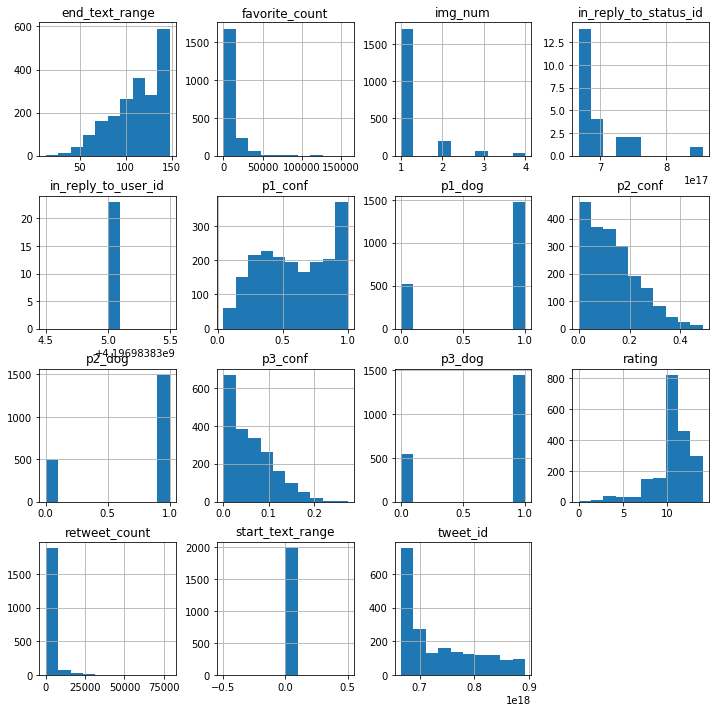

In [100]:
twitter_archive_master.hist(figsize=(12,12));

In [101]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating,favorite_count,retweet_count,start_text_range,end_text_range,img_num,p1_conf,p2_conf,p3_conf
count,1.991000e+03,2.300000e+01,2.300000e+01,1991.000000,1991.000000,1991.000000,1984.0,1984.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03
mean,7.358386e+17,6.978112e+17,4.196984e+09,10.549545,8340.781015,2478.645907,0.0,111.559980,1.203415,0.594082,1.345157e-01,6.027009e-02
std,6.749152e+16,4.359384e+16,0.000000e+00,2.188762,12316.232178,4450.452945,0.0,26.460075,0.561144,0.271856,1.007215e-01,5.092272e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,0.000000,0.000000,0.0,13.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758494e+17,6.732411e+17,4.196984e+09,10.000000,1778.500000,549.000000,0.0,94.000000,1.000000,0.362880,5.397835e-02,1.614795e-02
50%,7.084699e+17,6.757073e+17,4.196984e+09,11.000000,3733.000000,1187.000000,0.0,116.000000,1.000000,0.587764,1.175660e-01,4.948690e-02
75%,7.877641e+17,7.031489e+17,4.196984e+09,12.000000,10389.000000,2810.000000,0.0,137.000000,1.000000,0.845942,1.953115e-01,9.164355e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,14.000000,158280.000000,78884.000000,0.0,148.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [102]:
dog_image = twitter_archive_master.query("p1_dog == True or p2_dog == True or p3_dog == True")
print('The ML algorithm recognized ',round((dog_image.shape[0] / twitter_archive_master.shape[0]),2)\
      ,'% of images as dogs.')

The ML algorithm recognized  0.85 % of images as dogs.


Let us investigate the distribution of ratings with a boxplot diagram.

In [103]:
print('Total #of observations : ', twitter_archive_master.shape[0])

Total #of observations :  1991


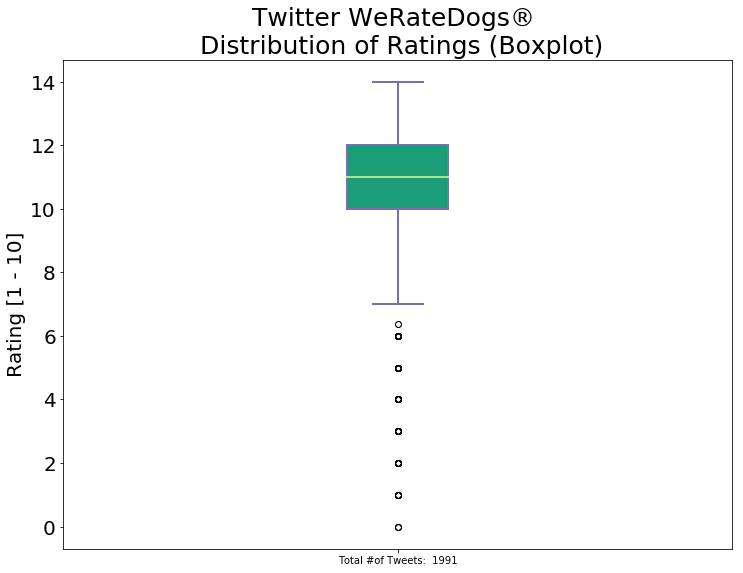

In [104]:
data_to_plot = [twitter_archive_master['rating']]

# Create a figure instance
fig = plt.figure(1, figsize=(12, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.title('Twitter WeRateDogs® \n Distribution of Ratings (Boxplot)', fontsize='25')
plt.ylabel('Rating [1 - 10]', fontsize='20')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['Total #of Tweets:  1991'])
plt.yticks(rotation='horizontal', fontsize=20)
plt.savefig('distribution_of_ratings.png')
plt.show();

In [105]:
twitter_archive_master['rating'].describe()

count    1991.000000
mean       10.549545
std         2.188762
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

Let us draw a histogram of `favorite_counts` and choose a high number of bins.

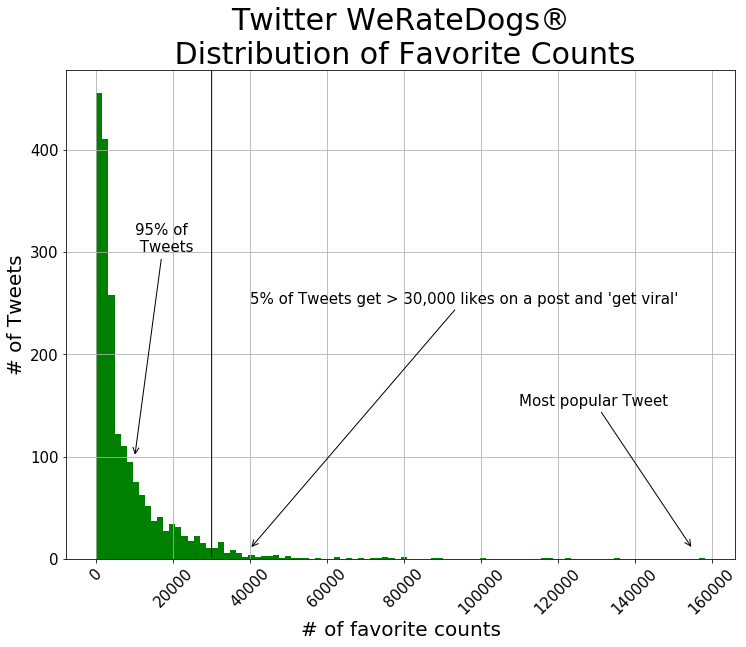

No of original Tweets:  1991
No of original Tweets with more than 60,000 favorite counts:  19  (top 1% )
No of original Tweets with more than 40,000 favorite counts:  40  (top 2% )
No of original Tweets with more than 30,000 favorite counts:  94  (top 5% )


In [107]:
fig, ax = plt.subplots(figsize=(12,9))

ax.annotate("Most popular Tweet",fontsize=15,
            xy=(155000, 10), xycoords='data',
            xytext=(110000, 150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("",fontsize=15,
            xy=(30000, 0), xycoords='data',
            xytext=(30000, 480), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            )
ax.annotate("95% of\n Tweets",fontsize=15,
            xy=(10000, 100), xycoords='data',
            xytext=(10000, 300), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("5% of Tweets get > 30,000 likes on a post and 'get viral'",fontsize=15,
            xy=(40000, 10), xycoords='data',
            xytext=(40000, 250), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.hist(twitter_archive_master['favorite_count'], bins=100, normed=False, facecolor='green', alpha=1)
plt.xlabel('# of favorite counts', fontsize=20)
plt.ylabel('# of Tweets', fontsize=20)
plt.title('Twitter WeRateDogs®\n Distribution of Favorite Counts', fontsize=30)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation='horizontal', fontsize=15)


plt.grid(True)
plt.savefig('distribution_of_favorite_counts.png')
plt.show()

print('No of original Tweets: ', len(df1_clean))
print('No of original Tweets with more than 60,000 favorite counts: '\
      , len(twitter_archive_master[twitter_archive_master['favorite_count']>=60000]),' (top 1% )')
print('No of original Tweets with more than 40,000 favorite counts: '\
      , len(twitter_archive_master[twitter_archive_master['favorite_count']>=40000]),' (top 2% )')
print('No of original Tweets with more than 30,000 favorite counts: '\
      , len(twitter_archive_master[twitter_archive_master['favorite_count']>=30000]),' (top 5% )')



We want to investigate the correlation between favorite_count and retweet count. Do the two variables move in sync?

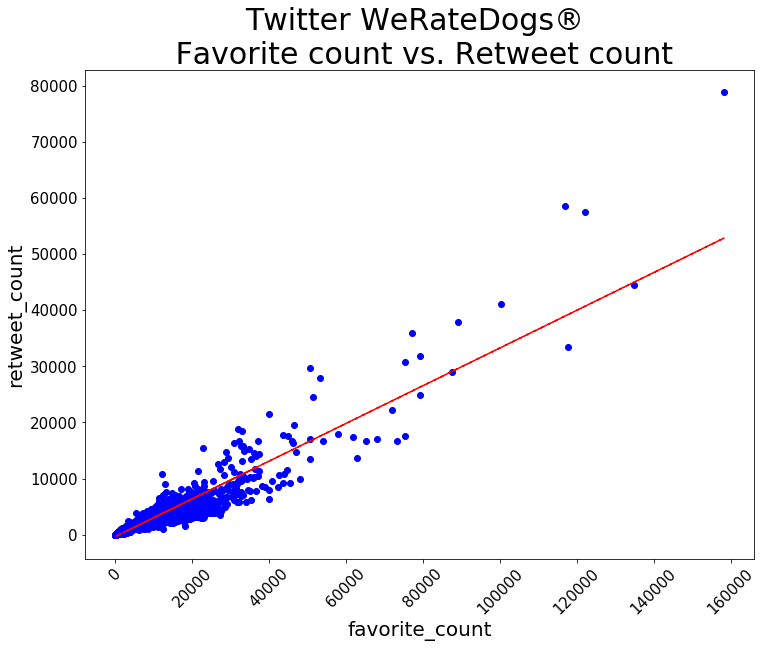

Linear regression
slope    :  0.33577
intercept: -321.90876
r_value  :  0.9292
r-squared:  0.863419751798


In [109]:
X = twitter_archive_master['favorite_count']
Y = twitter_archive_master['retweet_count']
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

plt.figure(figsize=(12,9))
plt.title('Twitter WeRateDogs® \n Favorite count vs. Retweet count',fontsize=30)
plt.xlabel('favorite_count', fontsize=20)
plt.ylabel('retweet_count', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation='horizontal', fontsize=15)

coef = np.polyfit(X,Y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X,Y, 'bo', X, poly1d_fn(X), '--r')
plt.savefig('favorite_count_vs_retweet_count.png')
plt.show()

print ('Linear regression')
print ('slope    : ', round (slope, 5))    # Slope of the regression line.
print ('intercept:',  round (intercept,5)) # Intercept of the regression line.
print ('r_value  : ', round (r_value,5))   # Correlation coefficient.
print ('r-squared: ', r_value**2)

In [110]:
print('Highest No. of favorite counts: ', twitter_archive_master.favorite_count.max())
print('Highest No. of retweet counts :  ', twitter_archive_master.retweet_count.max())

Highest No. of favorite counts:  158280
Highest No. of retweet counts :   78884


This is the most popular Twitter WeRateDogs® tweet with most favorite counts (i.e. likes) and retweet counts:

https://twitter.com/dog_rates/status/744234799360020481

In [111]:
twitter_archive_master[twitter_archive_master['tweet_id']== 744234799360020481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
773,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,doggo,None,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


The image of this tweet most likely shows a dog from the breed **Labrador Retriever** (p1 confidence 82.5%), the most popular dog breed in the USA according to the American Kennel Club (AKC) website. AKC.org is a leading content site for dogs as reported by ComScore, the industry’s leading tracking source.

https://www.akc.org/expert-advice/news/most-popular-dog-breeds-full-ranking-list/ . 


Next, let us investigate what are the most popular dog breeds in the Twitter WeRateDogs® tweet archive. We use the ML algorithm's p1 predictions and list the number of tweets for each dog breed.  

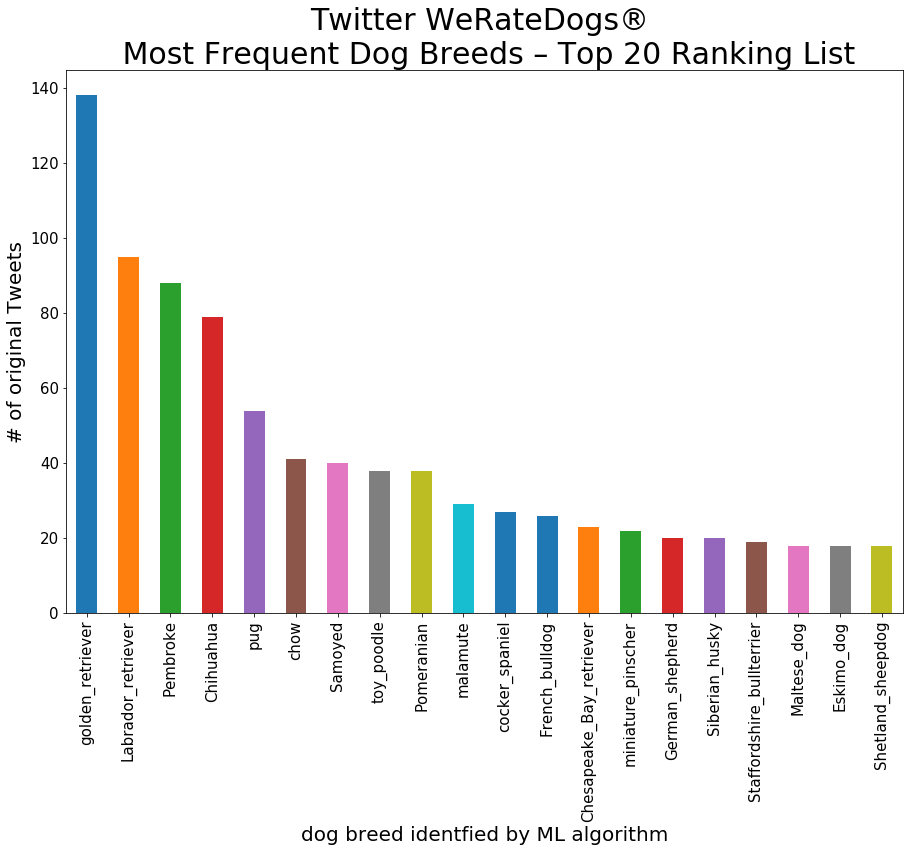

''

In [112]:
plt.figure(figsize=(12,9))
plt.title('Twitter WeRateDogs® \n Most Frequent Dog Breeds – Top 20 Ranking List',fontsize=30)
plt.xlabel('dog breed identfied by ML algorithm', fontsize=20)
plt.ylabel('# of original Tweets', fontsize=20)
plt.xticks(rotation='vertical', fontsize=15)
plt.yticks(rotation='horizontal', fontsize=15)
twitter_archive_master.query("p1_dog == True")['p1'].value_counts().head(20).plot(kind='bar',figsize=(15,10))
plt.savefig('most_frequent_dog_breeds.png')
plt.show()
;

In [113]:
print('There are 6 breeds of Retrievers')
print('Golden Retriever                   : ', twitter_archive_master.query("p1 == 'golden_retriever'").shape[0], 'in the dataframe')
print('Labrador Retriever                 : ', twitter_archive_master.query("p1 == 'Labrador_retriever'").shape[0])
print('Chesapeake Bay Retriever           : ', twitter_archive_master.query("p1 == 'Chesapeake_Bay_retriever'").shape[0])
print('Curly Coated Retriever             : ', twitter_archive_master.query("p1 == 'curly-coated_retriever'").shape[0])
print('Flat Coated Retriever              : ', twitter_archive_master.query("p1 == 'flat-coated_retriever'").shape[0])
print('Nova Scotia Duck Tolling Retriever : ', twitter_archive_master.query("p1 == 'nova-scotia-duck-tolling_retriever'").shape[0])

There are 6 breeds of Retrievers
Golden Retriever                   :  138 in the dataframe
Labrador Retriever                 :  95
Chesapeake Bay Retriever           :  23
Curly Coated Retriever             :  3
Flat Coated Retriever              :  8
Nova Scotia Duck Tolling Retriever :  0


In [114]:

golden_retriever          = twitter_archive_master.query("p1 == 'golden_retriever'").shape[0]
Labrador_retriever        = twitter_archive_master.query("p1 == 'Labrador_retriever'").shape[0]
Chesapeake_Bay_retriever  = twitter_archive_master.query("p1 == 'Chesapeake_Bay_retriever'").shape[0]
Pembroke                  = twitter_archive_master.query("p1 == 'Pembroke'").shape[0]
Chihuahua                 = twitter_archive_master.query("p1 == 'Chihuahua'").shape[0]
pug                       = twitter_archive_master.query("p1 == 'pug'").shape[0]
chow                      = twitter_archive_master.query("p1 == 'chow'").shape[0]

p_golden_retriever        = golden_retriever / twitter_archive_master.rating.shape[0]
p_Labrador_retriever      = Labrador_retriever/ twitter_archive_master.rating.shape[0]
p_Pembroke                = Pembroke/ twitter_archive_master.rating.shape[0]
p_Chihuahua               = Chihuahua/ twitter_archive_master.rating.shape[0]
p_pug                     = pug / twitter_archive_master.rating.shape[0]
p_chow                    = chow / twitter_archive_master.rating.shape[0]


Let us look at the correlation of rating and 'Likes':

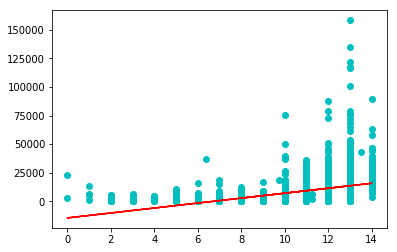

Linear regression
slope    :  2161.59658
intercept: -14463.07886
r_value  :  0.38415
r-squared:  0.147567530177


In [115]:
X = twitter_archive_master['rating']
Y = twitter_archive_master['favorite_count']
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
coef = np.polyfit(X,Y,1)    
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(X,Y, 'co', X, poly1d_fn(X), '-r')
plt.show()

print ('Linear regression')
print ('slope    : ', round (slope, 5))    # Slope of the regression line.
print ('intercept:',  round (intercept,5)) # Intercept of the regression line.
print ('r_value  : ', round (r_value,5))   # Correlation coefficient.
print ('r-squared: ', r_value**2)

Let us change the data type of `rating` to integer to facilitate further analysis.

In [116]:
twitter_archive_master.rating   =  twitter_archive_master.rating.astype(int)

In [117]:
rating_below10 = twitter_archive_master.query("rating <= 10")
rating_10      = twitter_archive_master.query("rating == 10")
rating_11      = twitter_archive_master.query("rating == 11")
rating_12      = twitter_archive_master.query("rating == 12")
rating_13      = twitter_archive_master.query("rating == 13")
rating_14      = twitter_archive_master.query("rating == 14")
rating_15      = twitter_archive_master.query("rating > 14")

In [118]:
print(rating_below10.favorite_count.mean())
print(rating_10.favorite_count.mean())
print(rating_11.favorite_count.mean())
print(rating_12.favorite_count.mean())
print(rating_13.favorite_count.mean())
print(rating_14.favorite_count.mean())
print(rating_15.favorite_count.mean())

3179.14148681
3785.86428571
6318.23703704
10565.0903084
21406.519084
27531.8333333
nan


Finally, let us look at the distribution of 'Likes' by rating. Can we forcast the likelihood of a tweet 'getting viral' (i.e. receiving more than 30000 'Likes') given its rating? 

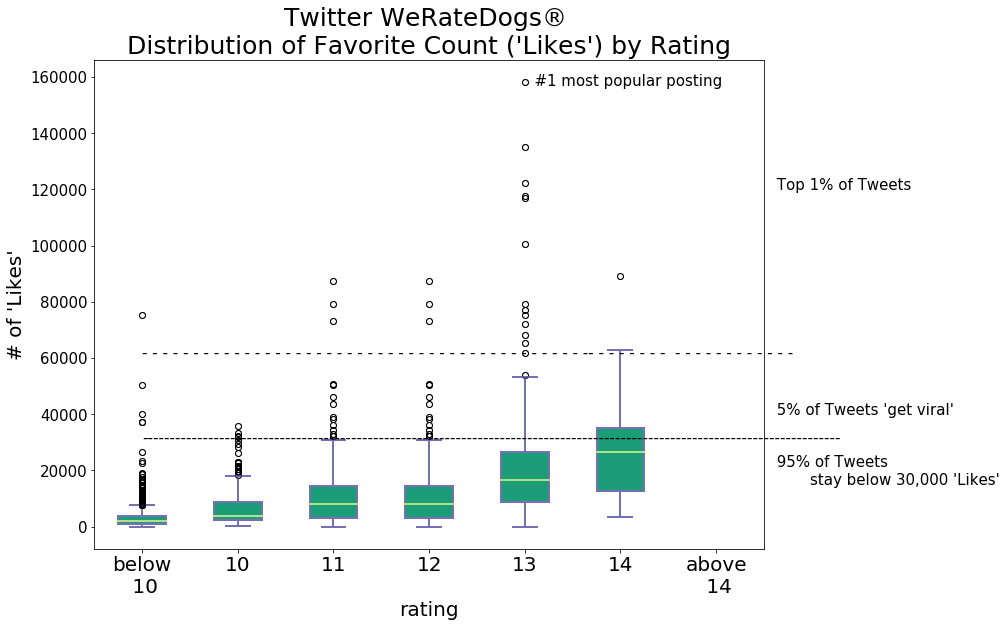

Probability to 'get viral' for rating < 10 =  0.6 %
Probability to 'get viral' for rating = 10 =  1.0 %
Probability to 'get viral' for rating = 11 =  1.2 %
Probability to 'get viral' for rating = 12 =  3.7 %
Probability to 'get viral' for rating = 13 =  19.8 %
Probability to 'get viral' for rating = 14 =  41.7 %


In [119]:
data_to_plot = [rating_below10['favorite_count'],rating_11['favorite_count'],\
                rating_12['favorite_count'],rating_12['favorite_count'],\
               rating_13['favorite_count'],rating_14['favorite_count'],
               rating_15['favorite_count']]

# Create a figure instance
fig = plt.figure(1, figsize=(12, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.title("Twitter WeRateDogs® \nDistribution of Favorite Count ('Likes') by Rating", fontsize='25')
plt.ylabel("# of 'Likes'", fontsize='20')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['below\n 10', '10', '11', '12','13','14','above\n 14'],fontsize=20)
plt.yticks(rotation='horizontal', fontsize=15)
plt.xlabel('rating', fontsize=20)
plt.annotate('  #1 most popular posting', (5, 157000), fontsize=15)
plt.annotate('                                 Top 1% of Tweets', (6, 120000), fontsize=15)
plt.annotate("                                 5% of Tweets 'get viral'", (6, 40000), fontsize=15)
plt.annotate("                                 95% of Tweets\n                                        \
stay below 30,000 'Likes'", (6, 15000), fontsize=15)
plt.annotate('--------------------------------------------------------------------------------------\
-----------------------------------------',(1, 30000), fontsize=15)
plt.annotate('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\
- - - - - - - -  - - - - - - - - - - - - ',\
             (1, 60000), fontsize=15)
plt.savefig('distribution_of_favorite_count_by_rating.png')
plt.show()
;


prob_below10 = rating_below10.query("favorite_count > 30000").shape[0]/rating_below10.shape[0]
prob_10      = rating_10.query("favorite_count > 30000").shape[0]/rating_10.shape[0]
prob_11      = rating_11.query("favorite_count > 30000").shape[0]/rating_11.shape[0]
prob_12      = rating_12.query("favorite_count > 30000").shape[0]/rating_12.shape[0]
prob_13      = rating_13.query("favorite_count > 30000").shape[0]/rating_13.shape[0]
prob_14      = rating_14.query("favorite_count > 30000").shape[0]/rating_14.shape[0]


print("Probability to 'get viral' for rating < 10 = ", round(prob_below10*100,1),'%')
print("Probability to 'get viral' for rating = 10 = ", round(prob_10*100,1),'%')
print("Probability to 'get viral' for rating = 11 = ", round(prob_11*100,1),'%')
print("Probability to 'get viral' for rating = 12 = ", round(prob_12*100,1),'%')
print("Probability to 'get viral' for rating = 13 = ", round(prob_13*100,1),'%')
print("Probability to 'get viral' for rating = 14 = ", round(prob_14*100,1),'%')


In [120]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating,favorite_count,retweet_count,start_text_range,end_text_range,img_num,p1_conf,p2_conf,p3_conf
count,1.991000e+03,2.300000e+01,2.300000e+01,1991.000000,1991.000000,1991.000000,1984.0,1984.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03
mean,7.358386e+17,6.978112e+17,4.196984e+09,10.548468,8340.781015,2478.645907,0.0,111.559980,1.203415,0.594082,1.345157e-01,6.027009e-02
std,6.749152e+16,4.359384e+16,0.000000e+00,2.188948,12316.232178,4450.452945,0.0,26.460075,0.561144,0.271856,1.007215e-01,5.092272e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,0.000000,0.000000,0.0,13.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758494e+17,6.732411e+17,4.196984e+09,10.000000,1778.500000,549.000000,0.0,94.000000,1.000000,0.362880,5.397835e-02,1.614795e-02
50%,7.084699e+17,6.757073e+17,4.196984e+09,11.000000,3733.000000,1187.000000,0.0,116.000000,1.000000,0.587764,1.175660e-01,4.948690e-02
75%,7.877641e+17,7.031489e+17,4.196984e+09,12.000000,10389.000000,2810.000000,0.0,137.000000,1.000000,0.845942,1.953115e-01,9.164355e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,14.000000,158280.000000,78884.000000,0.0,148.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id='conclusion'></a>
### Conclusion

In the first part, we have wrangled WeRateDogs Twitter data to facilitate thorough analysis and visualizations in the second part. We have gathered data from three different sources to get high quality data for this Twitter archive. Next, I have assessed the data visually and programmatically for quality and tidiness issues. We have detected and documented 27 quality issues and 3 tidiness issues. We have cleaned each of the issues documented while assessing. We have stored all the cleaned data in one master data file. 

In the second part, we have analysed and visualized the WeRateDogs Twitter data. We produced meaningful insights using statistics and visualizations. 
